# **Logistic Regression Part 1**

## Introduction

When an email lands in your inbox, how does your email service know whether it’s real or spam? This evaluation is made billions of times per day, and one possible method is logistic regression.

Logistic regression is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups (eg., spam or not spam).

Some other examples of problems that we could solve using logistic regression:
- Disease identification — Is a tumor malignant?
- Customer conversion — Will a customer arriving on a sign-up page enroll in a service?

Codecademy University’s Data Science department is interested in creating a model to predict whether or not a student will pass the final exam of its Introductory Machine Learning course. They plan to accomplish this by building a logistic regression model that predicts the probability of passing based on the number of hours a student reports studying. 0 indicates that a student failed the exam, and 1 indicates a student passed the exam.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

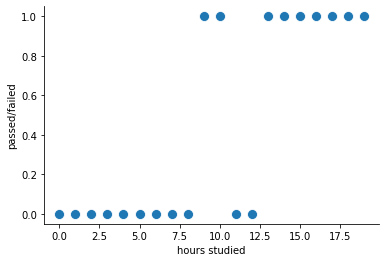

In [2]:
codecademyU = pd.read_csv('codecademyU.csv', delimiter='\t')

sns.scatterplot(x="hours_studied", y="passed_exam", data=codecademyU, s=100)
plt.xlabel("hours studied")
plt.ylabel("passed/failed")
sns.despine()

## Linear regression

With the data from Codecademy University, we want to predict whether each student will pass their final exam. Recall that in linear regression, we fit a line of the following form to the data: $$y=b_0+b_1x_1+b_2x_2+\dots+b_nx_n$$
where
- $y$ is the value we are trying to predict
- $b_0$ is the intercept of the regression line
- $b_1, b_2, \dots b_n$ are the coefficients
- $x_1, x_2, \dots x_n$ are the predictors (also sometimes called features)

For our data, y is a binary variable, equal to either 1 (passing), or 0 (failing). We have only one predictor ($x_1$): num_hours_studied. Below we’ve fitted a linear regression model to our data and plotted the results. The best fit line is in red.

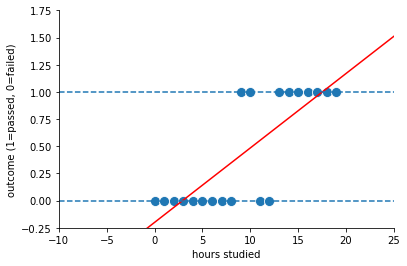

In [3]:
X = codecademyU.hours_studied.to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y = codecademyU.passed_exam)

sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
predictions = model.predict(sample_x)

fig, ax = plt.subplots()
sns.scatterplot(x="hours_studied", y="passed_exam", data=codecademyU, s=100)
sns.lineplot(x=sample_x.flatten(), y=predictions, color="red")
plt.xlim(-10, 25)
plt.ylim(-0.25, 1.75)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=1, linestyle='--')
plt.xlabel("hours studied")
plt.ylabel("outcome (1=passed, 0=failed)")
sns.despine()

We see that the linear model does not fit the data well. Our goal is to predict whether a student passes or fails; however, a best fit line allows predictions between negative and positive infinity.

## Logistic regression

To build a logistic regression model, we apply a logit link function to the left-hand side of our linear regression function: $$ln(\frac{y}{1−y})=b_0+b_1x_1+b_2x_2+\dots+b_nx_n$$

For the Codecademy University example, this means that we are fitting the curve shown below to our data — instead of a line, like in linear regression:

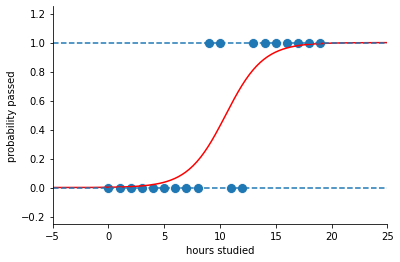

In [4]:
model = LogisticRegression()
model.fit(X=X, y = codecademyU.passed_exam)

sample_x = np.linspace(-16.65, 33.35, 300).reshape(-1,1)
pred_probs = model.predict_proba(sample_x)[:, 1]

fig, ax = plt.subplots()
sns.scatterplot(x="hours_studied", y="passed_exam", data=codecademyU, s=100)
sns.lineplot(x=sample_x.flatten(), y=pred_probs, color="red")
plt.xlim(-5, 25)
plt.ylim(-0.25, 1.25)
plt.axhline(y=0, linestyle='--')
plt.axhline(y=1, linestyle='--')
plt.xlabel("hours studied")
plt.ylabel("probability passed")
sns.despine()

## Log-odds

We’ve learned that the equation for a logistic regression model looks like this: $$ln(\frac{p}{1−p})=b_0+b_1x_1+b_2x_2+\dots+b_nx_n$$

Note that we’ve replaced y with the letter p because we are going to interpret it as a probability (eg., the probability of a student passing the exam). The whole left-hand side of this equation is called log-odds because it is the natural logarithm (*ln*) of odds ($\frac{p}{1-p}$). The right-hand side of this equation looks exactly like regular linear regression!

In order to understand how this link function works, let’s dig into the interpretation of **log-odds** a little more. The odds of an event occurring is: $$Odds = \frac{p}{1-p} = \frac{P(event\;occurring)}{P(event\;not\;occurring)}$$

For example, suppose that the probability a student passes an exam is 0.7. That means the probability of failing is $1 - 0.7 = 0.3$. Thus, the odds of passing are: $Odds\;of\;passing = \frac{0.7}{0.3} \approx 2.33$

This means that students are 2.33 times more likely to pass than to fail.

Odds can only be a positive number. When we take the natural log of odds (the log odds), we transform the odds from a positive value to a number between negative and positive infinity — which is exactly what we need! The logit function (log odds) transforms a probability (which is a number between 0 and 1) into a continuous value that can be positive or negative.

In [5]:
# assume there is a 40% chance of rain today
p = 0.4

# odds of rain
odds_of_rain = p / (1-p)
print("The odds of rain: ", round(odds_of_rain, 4))

# log odds of rain
log_odds_of_rain = np.log(odds_of_rain)
print("The log odds of rain: ", round(log_odds_of_rain, 4))

The odds of rain:  0.6667
The log odds of rain:  -0.4055


In [6]:
# assume there is a 90% chance the train arrives on time
p = 0.9

# odds of train arriving on time
odds_on_time = p / (1-p)
print("The odds of the train arriving on time: ", round(odds_on_time, 4))

# log odds of train arriving on time
log_odds_on_time = np.log(odds_on_time)
print("The log odds of the training arriving on time: ", round(log_odds_on_time, 4))

The odds of the train arriving on time:  9.0
The log odds of the training arriving on time:  2.1972


## Sigmoid function

Suppose that we want to fit a model that predicts whether a visitor to a website will make a purchase. We’ll use the number of minutes they spent on the site as a predictor. The following code fits the model:
```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(purchase, min_on_site)
```

Next, just like linear regression, we can use the right-hand side of our regression equation to make predictions for each of our original datapoints:
```
log_odds = model.intercept_ + model.coef_ * min_on_site 
print(log_odds)
```

Output:
```
[[-3.28394203]
 [-1.46465328]
 [-0.02039445]
 [ 1.22317391]
 [ 2.18476234]]
```

Notice that these predictions range from negative to positive infinity: these are log odds. In other words, for the first datapoint, we have: $$ln(\frac{p}{1−p}) = −3.28394203$$

We can turn log odds into a probability as follows:

$$\begin{align}
    ln(\frac{p}{1−p}) &= −3.28 \\
    \frac{p}{1-p} &= e^{-3.28} \\
    p &= e^{-3.28}(1-p) \\
    p &= e^{-3.28} - e^{-3.28}\times p \\
    p + e^{-3.28} \times p &= e^{-3.28} \\
    p \times (1+e^{-3.28}) &= e^{-3.28} \\
    p &= \frac{e^{-3.28}}{1 + e^{-3.28}} \\
    p &= 0.04 \\
\end{align}$$

In Python, we can do this simultaneously for all of the datapoints using NumPy (loaded as np):
`np.exp(log_odds)/(1+ np.exp(log_odds))`

Output:
```
array([[0.0361262 ],
       [0.18775665],
       [0.49490156],
       [0.77262162],
       [0.89887279]])
```

The calculation that we just did required us to use something called the sigmoid function, which is the inverse of the logit function. The sigmoid function produces the S-shaped curve we saw previously:
<img src="sigmoid_function.png" alt="sigmoid function image" height="10%">

In [7]:
model = LogisticRegression()
model.fit(X=X, y = codecademyU.passed_exam)

intercept = model.intercept_
coef = model.coef_

# calculate the predicted log-odds
hours_studied = codecademyU[['hours_studied']]
log_odds = intercept + coef * hours_studied
log_odds.head()

,hours_studied
0,-6.236653
1,-5.643001
2,-5.049350
3,-4.455698
4,-3.862046


In [8]:
# convert the predicted log-odds into predicted probabilities
pred_probability_passing = np.exp(log_odds)/(1+ np.exp(log_odds))
pred_probability_passing.head()

,hours_studied
0,0.001953
1,0.003530
2,0.006373
3,0.011479
4,0.020592


## Fitting a model in sklearn

Begin by importing the `LogisticRegression` module and creating a `LogisticRegression` object:
```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
```

After creating the object, we need to fit our model on the data. We can accomplish this using the `.fit()` method, which takes two parameters: a matrix of features and a matrix of class labels (the outcome we are trying to predict).
`model.fit(features, labels)`

Now that the model is trained, we can access a few useful attributes:
- `model.coef_` is a vector of the coefficients of each feature
- `model.intercept_` is the intercept

The coefficients can be interpreted as follows:
- Large positive coefficient: a one unit increase in that feature is associated with a large **increase** in the log odds (and therefore probability) of a datapoint belonging to the positive class (the outcome group labeled as `1`)
- Large negative coefficient: a one unit increase in that feature is associated with a large **decrease** in the log odds/probability of belonging to the positive class.
- Coefficient of 0: The feature is not associated with the outcome.

One important note is that `sklearn`'s logistic regression implementation requires the features to be standardized because regularization is implemented by default.

In [9]:
codecademyU = pd.read_csv('codecademyU_v2.csv', index_col=0)

X = codecademyU[['hours_studied', 'practice_test']]
y = codecademyU.passed_exam

# standardise X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# create and fit the model
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

intercept = cc_lr.intercept_
coefs = cc_lr.coef_

print(intercept)
print(coefs)

[-0.13173123]
[[1.5100409  0.12002228]]


## Predictions in sklearn

Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as `1`) using the `.predict()` method. The input is a matrix of features and the output is a vector of predicted labels, `1` or `0`.
```
print(model.predict(features))
# Sample output: [0 1 1 0 0]
```

If we are more interested in the predicted probability of group membership, we can use the `.predict_proba()` method. The input to `predict_proba()` is also a matrix of features and the output is an array of probabilities, ranging from `0` to `1`:
```
print(model.predict_proba(features)[:,1])
# Sample output: [0.32 0.75  0.55 0.20 0.44]
```

By default, `.predict_proba()` returns the probability of class membership for both possible groups. In the example code above, we’ve only printed out the probability of belonging to the positive class. Notice that datapoints with predicted probabilities greater than 0.5 (the second and third datapoints in this example) were classified as `1`s by the `.predict()` method. This is a process known as thresholding. As we can see here, sklearn sets the default classification threshold probability as 0.5.

In [10]:
preds = cc_lr.predict(X_test)
pred_probs = cc_lr.predict_proba(X_test)[:, 1]

pred_df = pd.DataFrame(data={'actuals': y_test, 'predictions': preds, 'probabilities': pred_probs})
pred_df

,actuals,predictions,probabilities
7,0,0,0.320659
15,1,1,0.793188
0,0,0,0.055475
11,0,1,0.577479
17,1,1,0.870704


## Classification thresholding

As we’ve seen, logistic regression is used to predict the probability of group membership. Once we have this probability, we need to make a decision about what class a datapoint belongs to. This is where the classification threshold comes in!

The default threshold for `sklearn` is `0.5`. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, `0.5`, the datapoint is assigned to the positive class.
<img src="thresholding_p1.png" alt="thresholding image" width="50%" height="75%">

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a logistic regression model that classifies whether or not an individual has cancer, we may want to be more sensitive to the positive cases. We wouldn’t want to tell someone they don’t have cancer when they actually do!

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to `0.3` or `0.4`, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

<img src="thresholding_p2.png" alt="thresholding image" width="50%" height="75%">

In [11]:
# threshold of 0.5
preds = cc_lr.predict(X_test)
pred_probs = cc_lr.predict_proba(X_test)[:, 1]

pred_df = pd.DataFrame(data={'actuals': y_test, 'predictions': preds, 'probabilities': pred_probs})
pred_df

,actuals,predictions,probabilities
7,0,0,0.320659
15,1,1,0.793188
0,0,0,0.055475
11,0,1,0.577479
17,1,1,0.870704


In [12]:
# increase the threshold to 0.7
alternative_threshold = 0.7

pred_probs = cc_lr.predict_proba(X_test)[:, 1]
preds = (pred_probs > alternative_threshold).astype(int)

pred_df = pd.DataFrame(data={'actuals': y_test, 'predictions': preds, 'probabilities': pred_probs})
pred_df

,actuals,predictions,probabilities
7,0,0,0.320659
15,1,1,0.793188
0,0,0,0.055475
11,0,0,0.577479
17,1,1,0.870704


## Confusion matrix

When we fit a machine learning model, we need some way to evaluate it. Often, we do this by splitting our data into training and test datasets. We use the training data to fit the model; then we use the test set to see how well the model performs with new data.

As a first step, data scientists often look at a confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives.

For example, suppose that the true and predicted classes for a logistic regression model are:
```
y_true = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1]
y_pred = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
```

We can create a confusion matrix as follows:
```
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))
```

Output:
```
array([[3, 2],
       [1, 4]])
```
This output tells us that there are 3 true negatives, 1 false negative, 4 true positives, and 2 false positives. Ideally, we want the numbers on the main diagonal (in this case, 3 and 4, which are the true negatives and true positives, respectively) to be as large as possible.

In [13]:
# save and print the predicted outcomes
y_pred = cc_lr.predict(X_test)
print('predicted classes: ', y_pred)

# print out the true outcomes for the test data
print('true classes: ', y_test)

predicted classes:  [0 1 0 1 1]
true classes:  7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


In [14]:
print('confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

confusion matrix: 
[[2 1]
 [0 2]]


## Accuracy, Recall, Precision, F1 Score

Once we have a confusion matrix, there are a few different statistics we can use to summarize the four values in the matrix. These include accuracy, precision, recall, and F1 score. We won’t go into much detail about these metrics here, but a quick summary is shown below (T = true, F = false, P = positive, N = negative). For all of these metrics, a value closer to 1 is better and closer to 0 is worse.
- Accuracy = (TP + TN)/(TP + FP + TN + FN)
- Precision = TP/(TP + FP)
- Recall = TP/(TP + FN)
- F1 score: weighted average of precision and recall

In `sklearn`, we can calculate these metrics as follows:
```
# accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))
# output: 0.7
 
# precision:
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred))
# output: 0.67
 
# recall: 
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred))
# output: 0.8
 
# F1 score
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred))
# output: 0.73
```

In [15]:
print('accuracy: ')
print(accuracy_score(y_test, y_pred))
print('-----')
print('precision: ')
print(precision_score(y_test, y_pred))
print('-----')
print('recall: ')
print(recall_score(y_test, y_pred))
print('-----')
print('f1_score: ')
print(f1_score(y_test, y_pred))

accuracy: 
0.8
-----
precision: 
0.6666666666666666
-----
recall: 
1.0
-----
f1_score: 
0.8


## Review

Congratulations! You just learned how a logistic regression model works and how to fit one to a dataset. Here are some of the things you learned:
- Logistic regression is used to perform binary classification.
- Logistic regression is an extension of linear regression where we use a logit link function to fit a sigmoid curve to the data, rather than a line.
- We can use the coefficients from a logistic regression model to estimate the log odds that a datapoint belongs to the positive class. We can then transform the log odds into a probability.
- The coefficients of a logistic regression model can be used to estimate relative feature importance.
- A classification threshold is used to determine the probabilistic cutoff for where a data sample is classified as belonging to a positive or negative class. The default cutoff in sklearn is 0.5.
- We can evaluate a logistic regression model using a confusion matrix or summary statistics such as accuracy, precision, recall, and F1 score.